## Exploración Inicial y Limpieza de Datos

In [19]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np

# Carga del dataset
file_path = "data/diabetes.csv"
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [20]:
# Identificación de valores duplicados
print("\nNúmero de registros duplicados:", data.duplicated().sum())
if data.duplicated().sum() > 0:
    data = data.drop_duplicates()
    print("Duplicados eliminados.")


Número de registros duplicados: 0


In [21]:
# Diccionario de datos
print("\nDescripción de las columnas:")
print("""
- Pregnancies: Número de embarazos.
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
- BloodPressure: Presión arterial diastólica (mm Hg).
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
- Insulin: Niveles séricos de insulina a las 2 horas (mu U/ml).
- BMI: Índice de masa corporal (peso en kg / (altura en m)^2).
- DiabetesPedigreeFunction: Función de pedigrí de diabetes.
- Age: Edad (años).
- Outcome: Variable objetivo (1: diabetes, 0: no diabetes).
""")


Descripción de las columnas:

- Pregnancies: Número de embarazos.
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
- BloodPressure: Presión arterial diastólica (mm Hg).
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
- Insulin: Niveles séricos de insulina a las 2 horas (mu U/ml).
- BMI: Índice de masa corporal (peso en kg / (altura en m)^2).
- DiabetesPedigreeFunction: Función de pedigrí de diabetes.
- Age: Edad (años).
- Outcome: Variable objetivo (1: diabetes, 0: no diabetes).



In [22]:
# Verificación y ajuste de tipos de datos
print("\nTipos de datos antes de ajustes:")
print(data.dtypes)


Tipos de datos antes de ajustes:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [23]:
# Convertir columnas a tipo numérico si es necesario (Ejemplo: asegurarnos de que no hay strings mal formateados)
data = data.apply(pd.to_numeric, errors='coerce')
print("\nTipos de datos después de ajustes:")
print(data.dtypes)


Tipos de datos después de ajustes:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [24]:
# Detección de valores faltantes
print("\nNúmero de valores faltantes por columna:")
print(data.isnull().sum())


Número de valores faltantes por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


  La media es sensible a valores extremos. Si una columna tiene outliers, estos pueden distorsionar significativamente el valor promedio y llevar a una imputación que no represente adecuadamente la distribución de los datos.

  La mediana, al ser el valor central de los datos ordenados, no se ve afectada por valores extremos, lo que la hace más robusta en estos casos.

In [25]:
# Manejo de valores faltantes (Imputación con la mediana)
data.fillna(data.median(), inplace=True)
print("\nRevisión después de manejar valores faltantes:")
print(data.isnull().sum())


Revisión después de manejar valores faltantes:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [26]:
# Guardar la versión limpia del dataset en la carpeta de data manipulada
cleaned_file_path = "data/manipulado/diabetes_cleaned.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nDataset limpio guardado en {cleaned_file_path}")


Dataset limpio guardado en data/manipulado/diabetes_cleaned.csv


## Análisis Exploratorio de Datos

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
data = pd.read_csv(cleaned_file_path)

# Visualización de información general
print("Información general del dataset:")
print(data.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset:")
print(data.describe())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Estadísticas descriptivas del dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      


Generando histogramas de las variables numéricas...


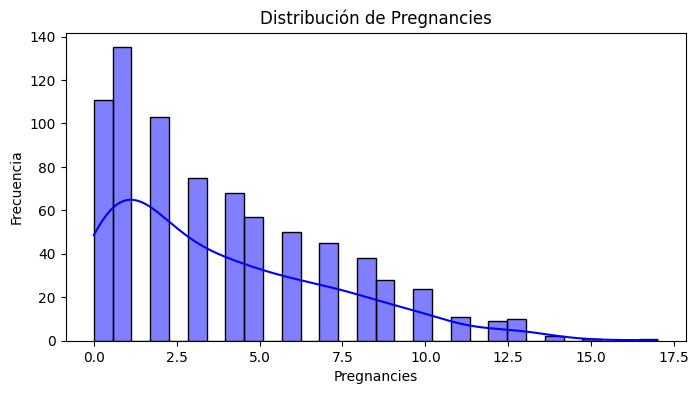

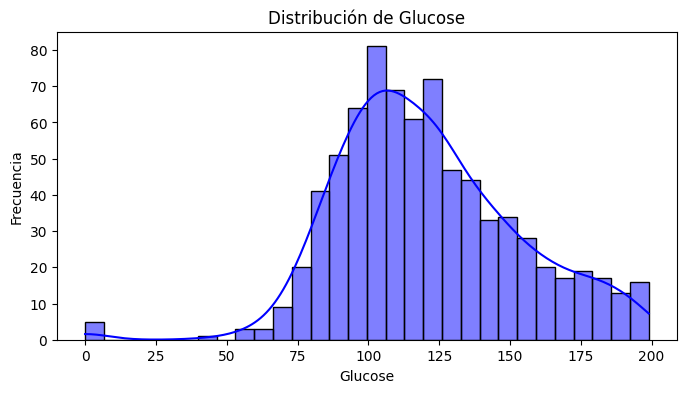

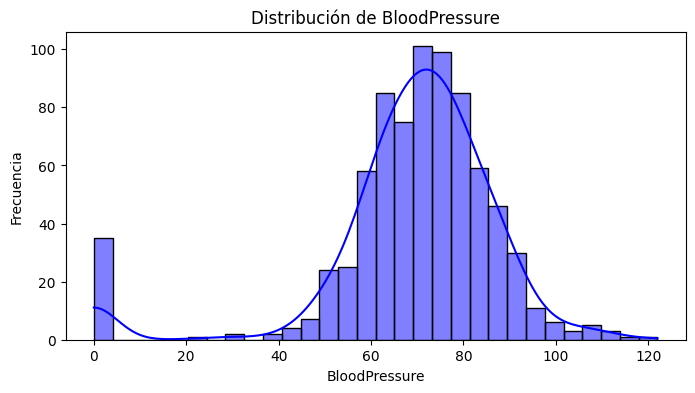

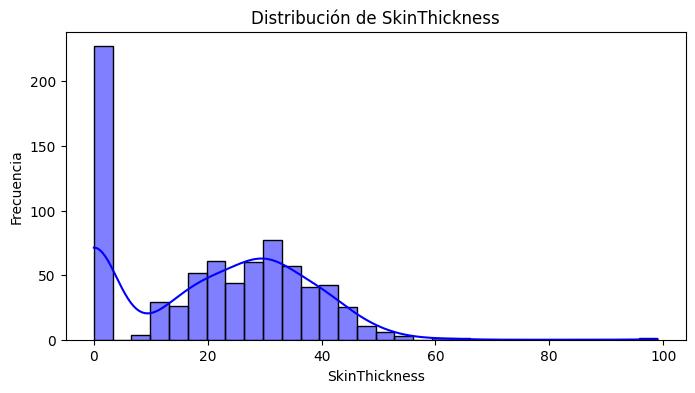

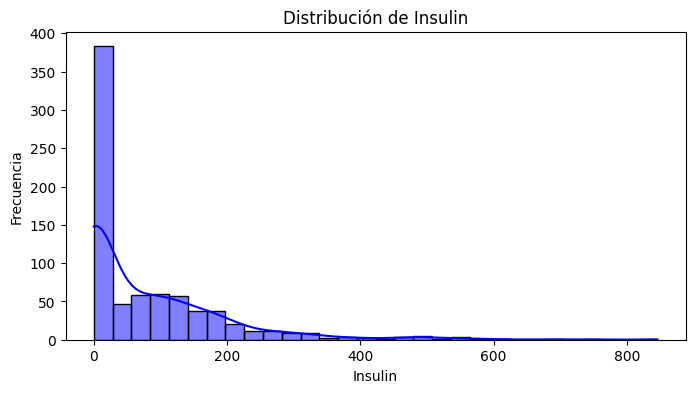

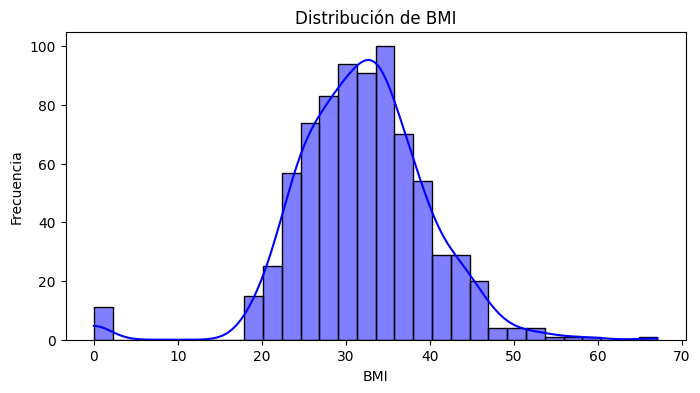

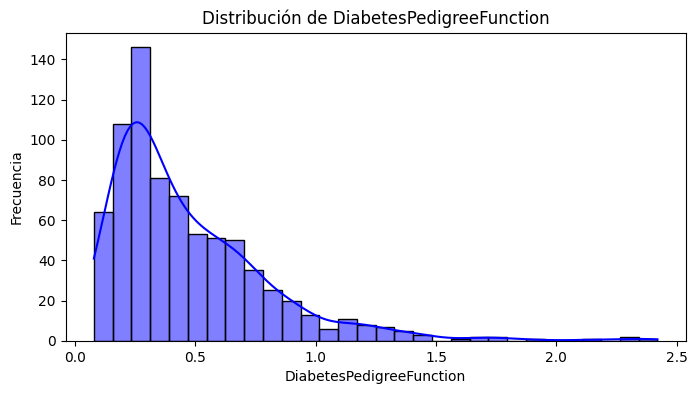

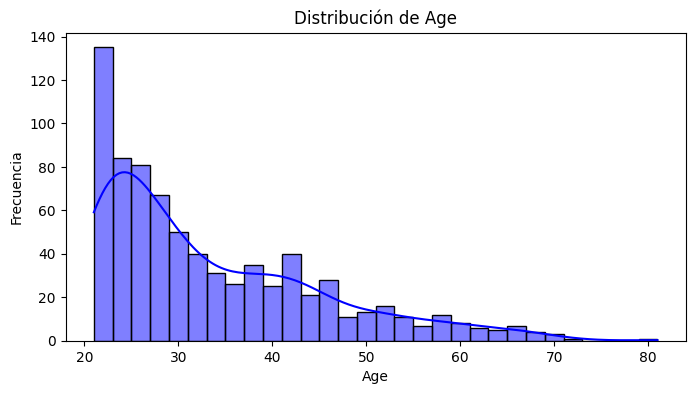

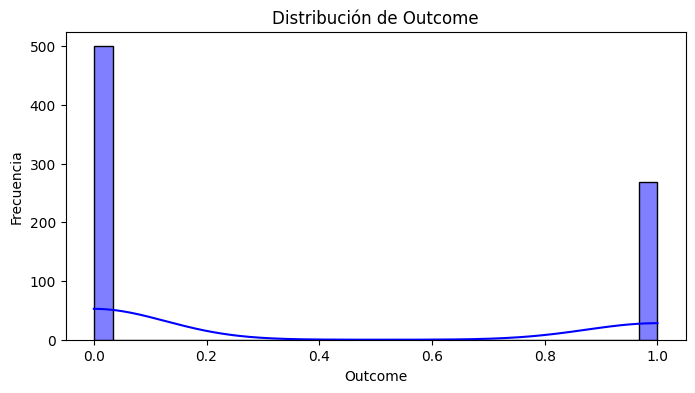

In [28]:
# Histogramas para ver la distribución de las variables numéricas
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("\nGenerando histogramas de las variables numéricas...")
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


Generando histogramas de las variables numéricas...


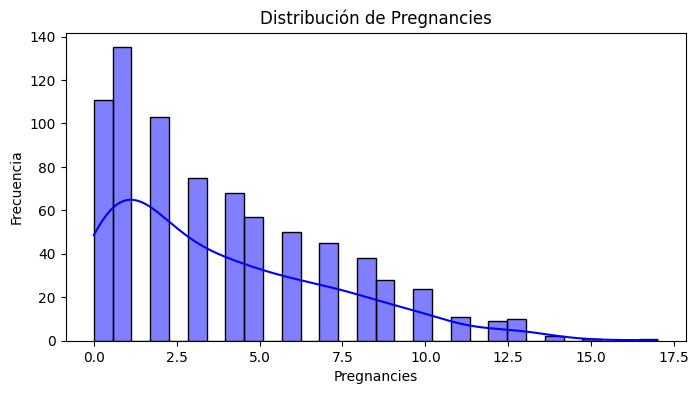

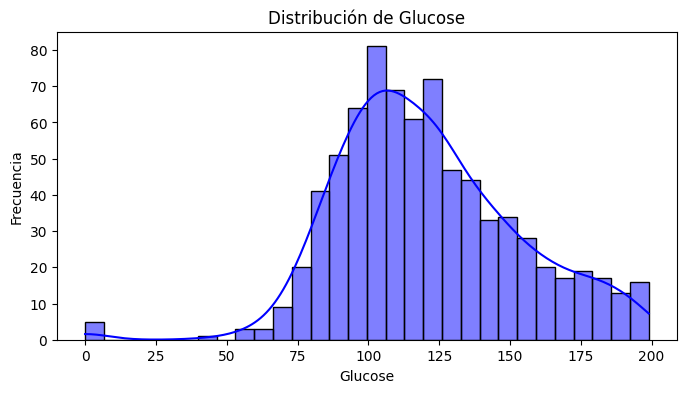

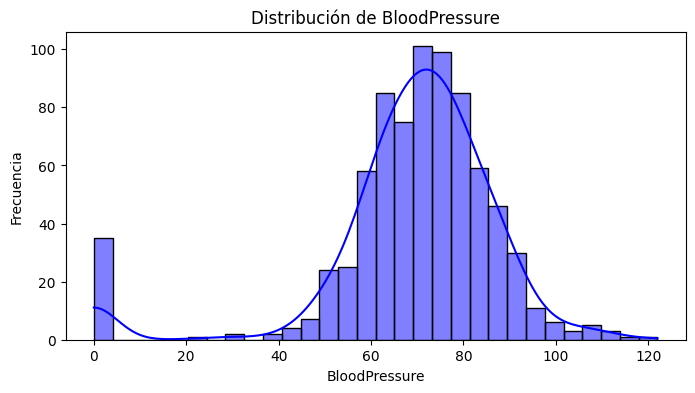

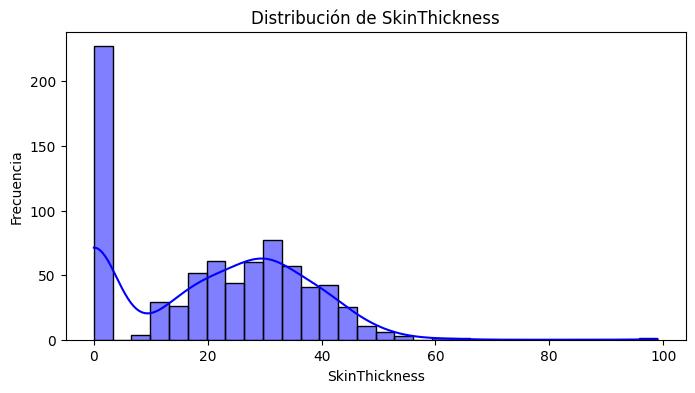

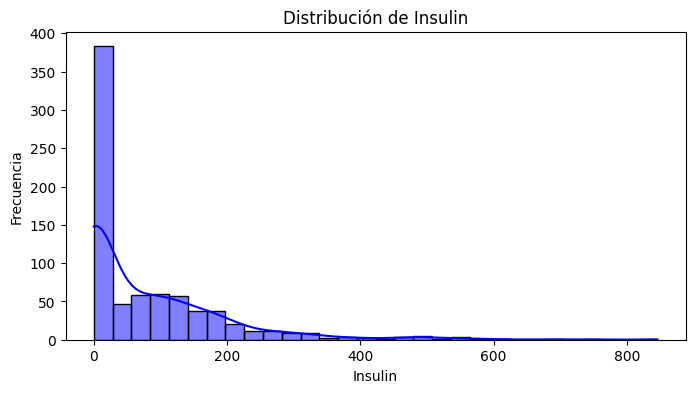

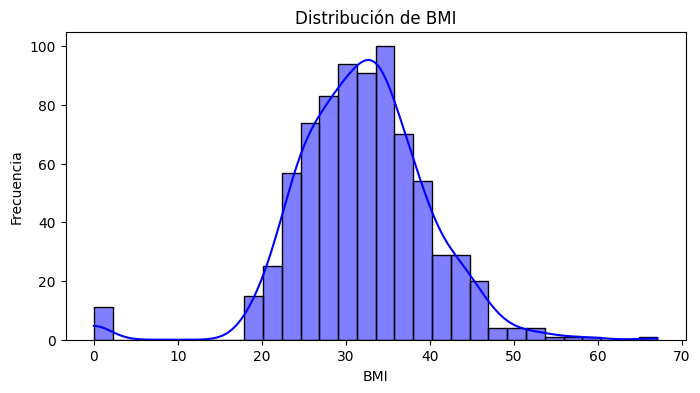

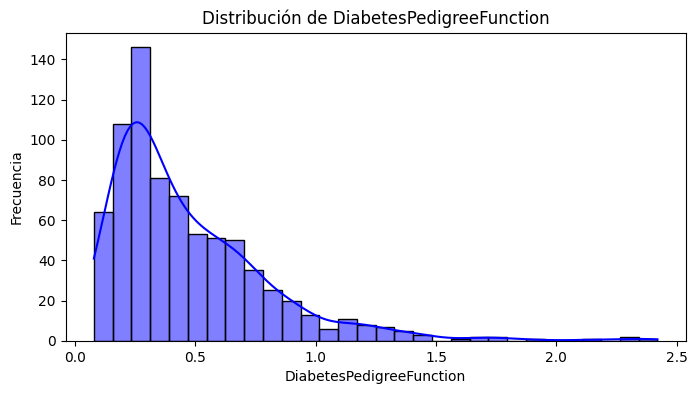

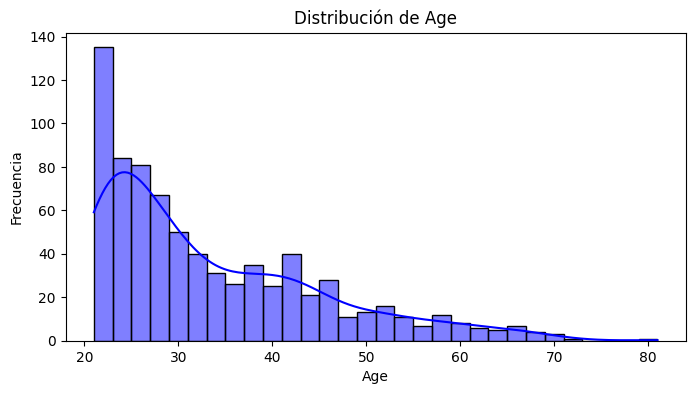

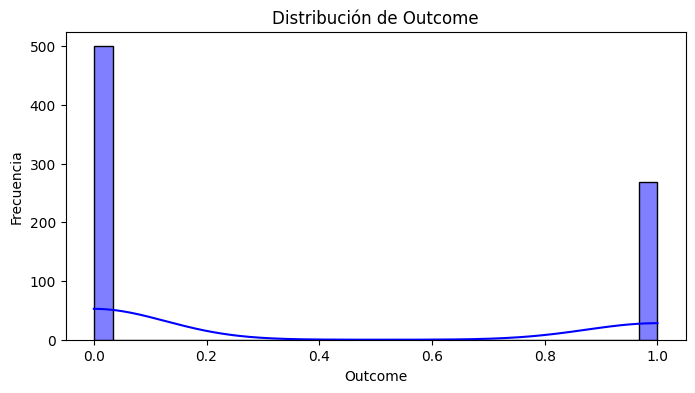

In [29]:
# Histogramas para ver la distribución de las variables numéricas
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("\nGenerando histogramas de las variables numéricas...")
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


Generando diagramas de caja para identificar outliers...


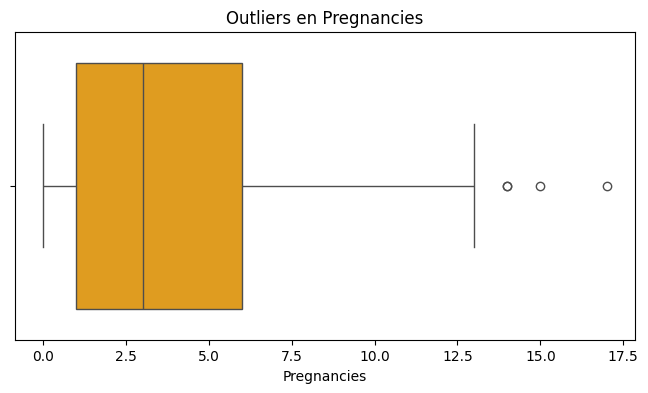

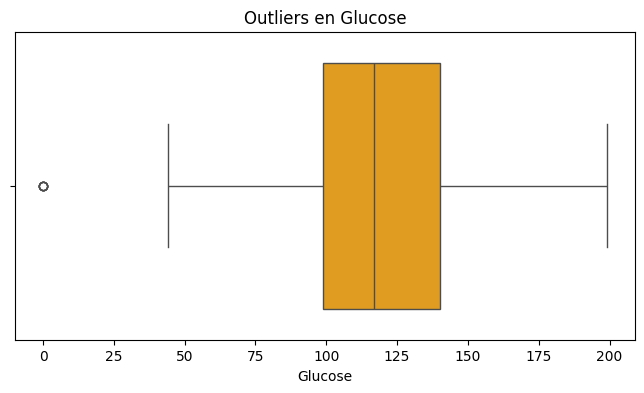

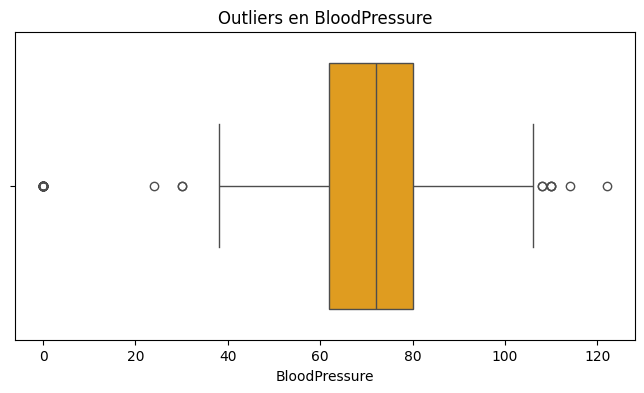

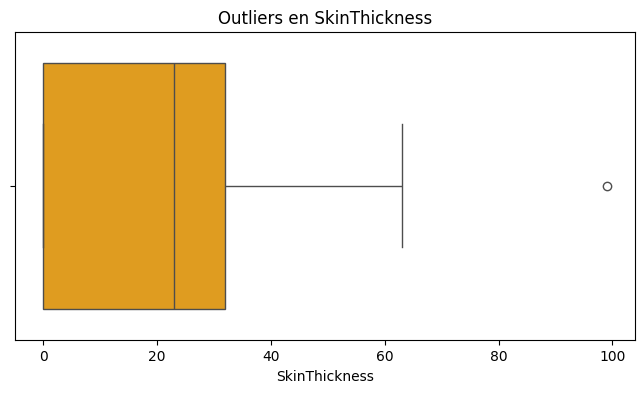

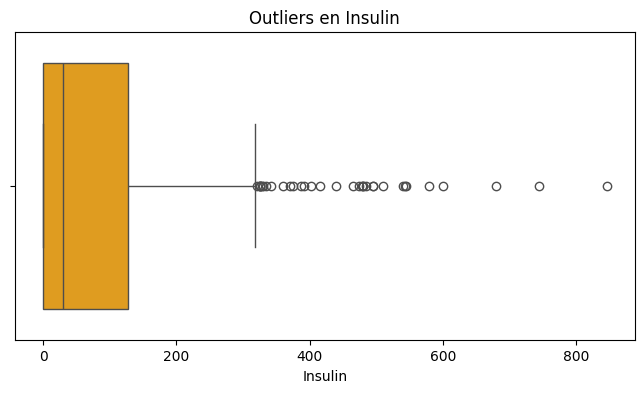

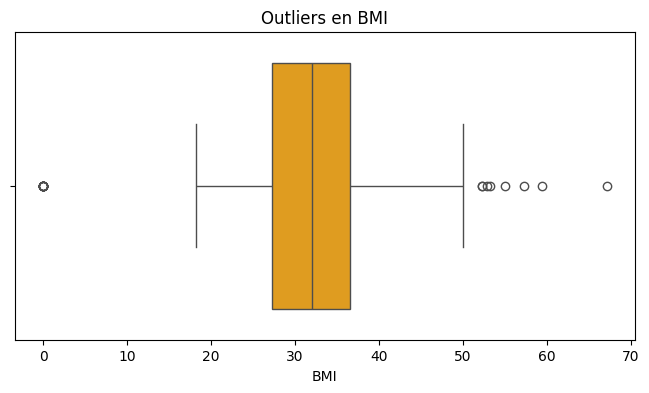

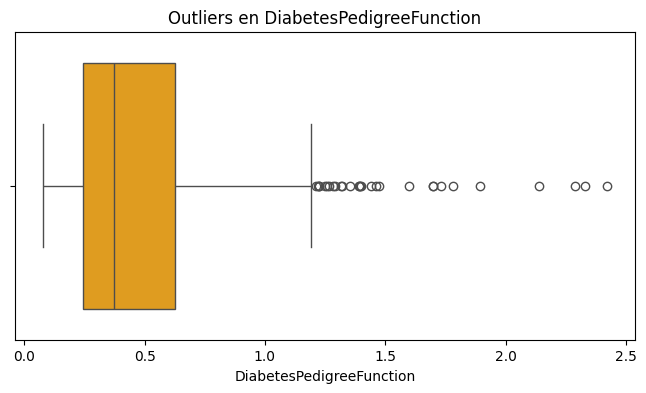

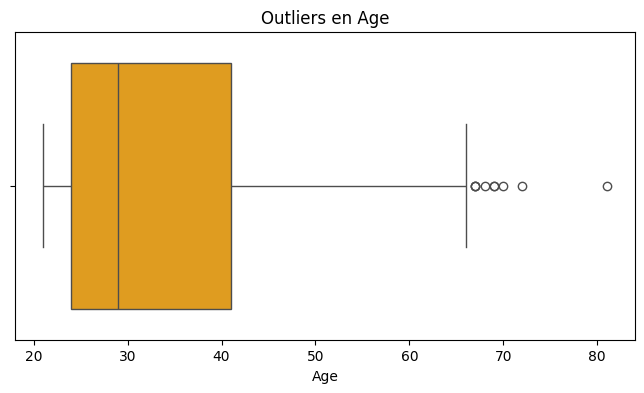

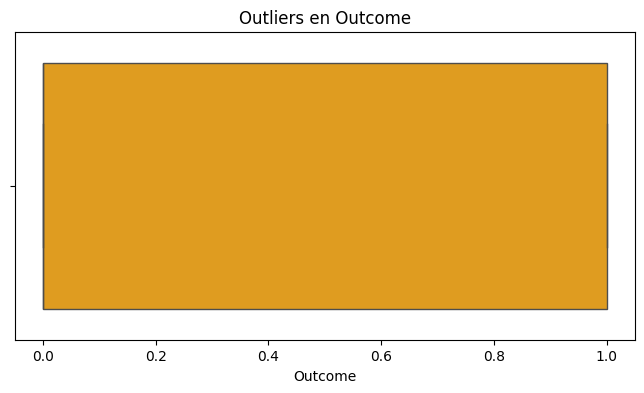

In [30]:
# Diagramas de caja (boxplots) para detectar outliers
print("\nGenerando diagramas de caja para identificar outliers...")
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='orange')
    plt.title(f"Outliers en {col}")
    plt.xlabel(col)
    plt.show()


Distribución de la variable objetivo (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64


/var/folders/5d/7gh47wqd111dyfvyv6wz8xtw0000gn/T/ipykernel_7420/497987201.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='pastel')


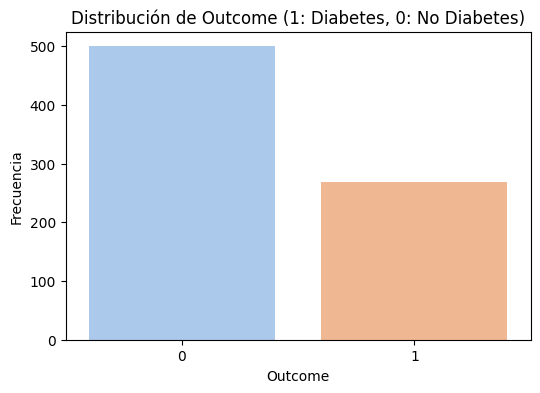

In [31]:
# Análisis de la variable objetivo (Outcome)
print("\nDistribución de la variable objetivo (Outcome):")
print(data['Outcome'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data, palette='pastel')
plt.title("Distribución de Outcome (1: Diabetes, 0: No Diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Frecuencia")
plt.show()

In [32]:
# Correlación entre variables
print("\nCalculando la matriz de correlación...")
correlation_matrix = data.corr()


Calculando la matriz de correlación...


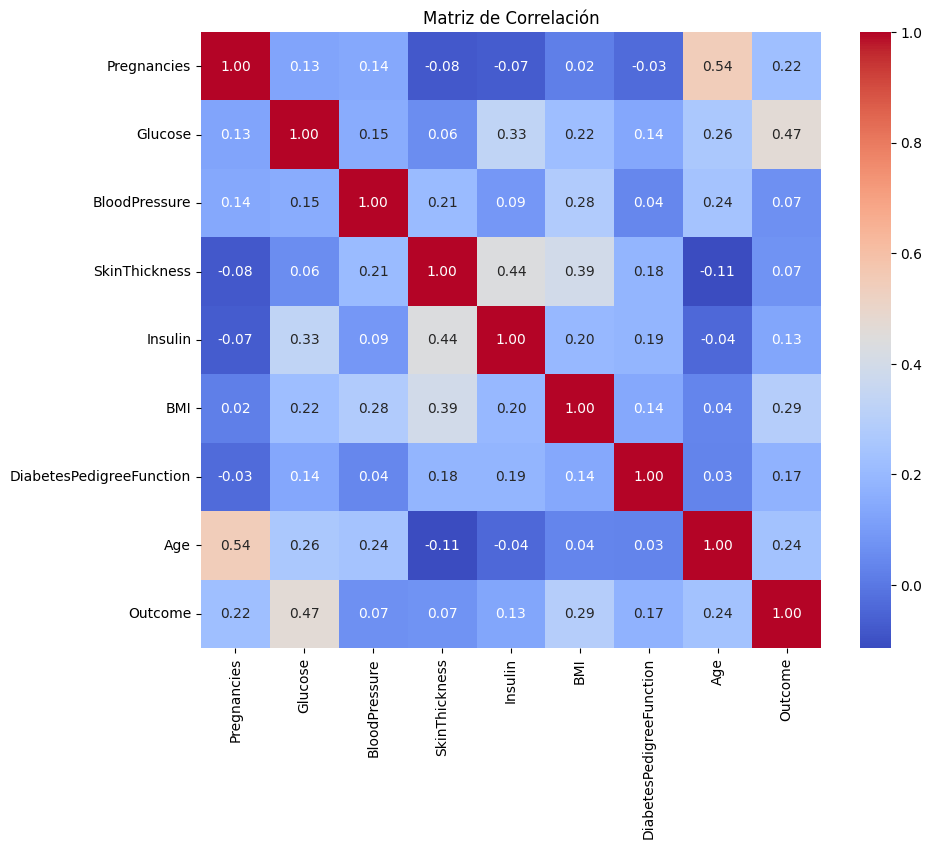

In [33]:
# Mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [34]:
# Relaciones entre las variables más correlacionadas
print("\nExplorando relaciones entre variables más correlacionadas...")
strong_corrs = correlation_matrix['Outcome'].abs().sort_values(ascending=False)
print("Variables con mayor correlación con 'Outcome':")
print(strong_corrs[1:4])  # Excluyendo la variable 'Outcome' misma


Explorando relaciones entre variables más correlacionadas...
Variables con mayor correlación con 'Outcome':
Glucose    0.466581
BMI        0.292695
Age        0.238356
Name: Outcome, dtype: float64


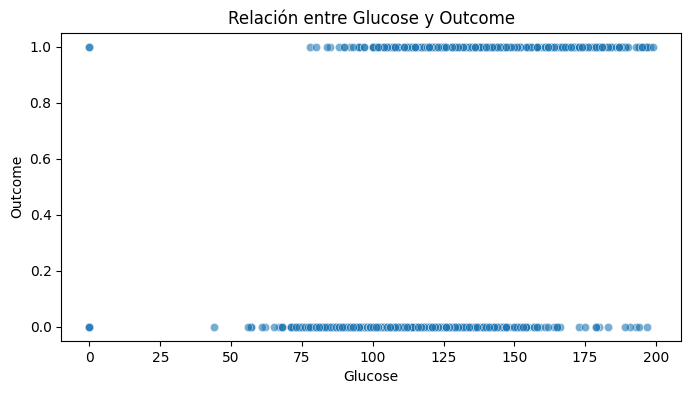

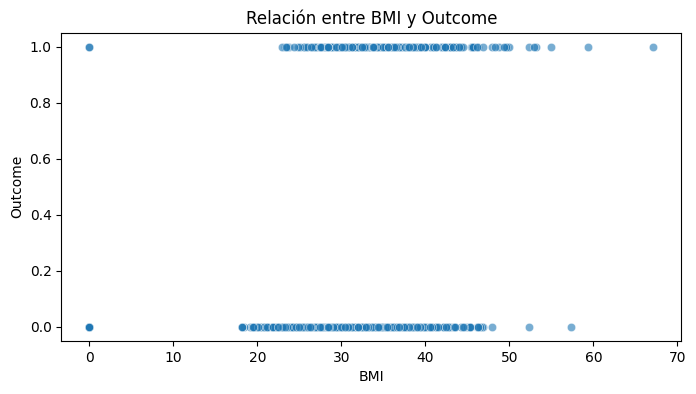

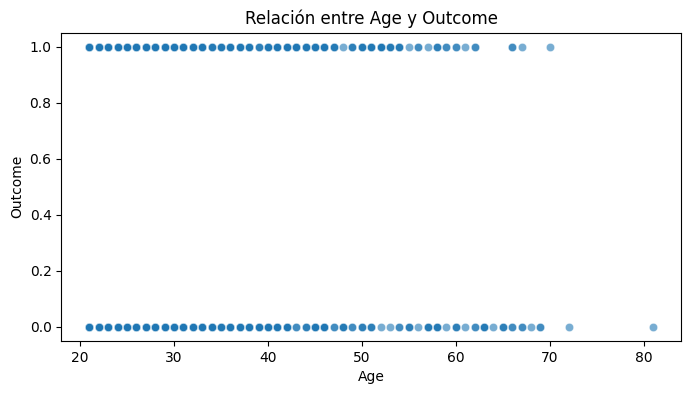

In [35]:
# Diagramas de dispersión (scatter plots) para las variables más correlacionadas
for col in strong_corrs[1:4].index:  # Tomamos las 3 variables más correlacionadas con Outcome
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=data[col], y=data['Outcome'], alpha=0.6)
    plt.title(f"Relación entre {col} y Outcome")
    plt.xlabel(col)
    plt.ylabel("Outcome")
    plt.show()